<a href="https://colab.research.google.com/github/Ishank2301/Pratise-ML-Algorithums/blob/main/ML_practise(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's Perform the Basic of ML(Preprocessing,DataCleaning):

Let's Download the data or fetch from our Local server:

In [128]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

/tmp/ipython-input-2839428726.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


In [129]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
housing = pd.read_csv('housing.csv')

# Let's take a look at our data structure

In [130]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [131]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [132]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [133]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [134]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Let's check our feature data distribution through these histogram plots:

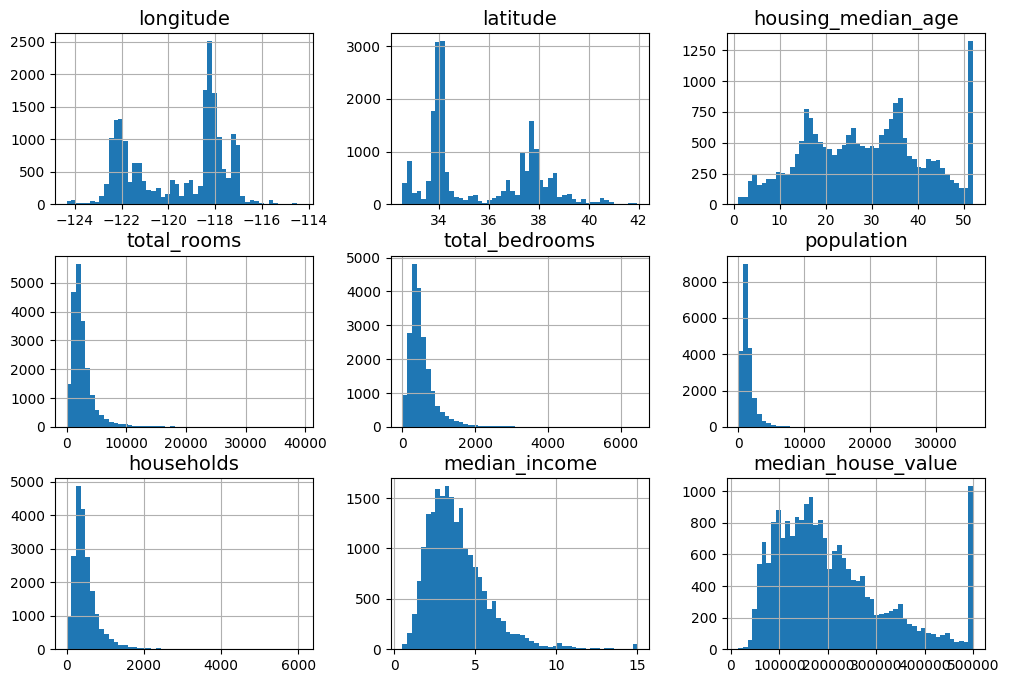

In [135]:
import matplotlib.pyplot as plt
# The next 5 lines of code define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14,titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50,figsize=(12,8))
#save_fig("attribute_histogram_plots")  # Extra code to save the plot
plt.show()

In [136]:
import numpy as np
def shuffle_and_split_data(data,test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [137]:
train_set, test_set = shuffle_and_split_data(housing,0.2)
len(train_set)

16512

In [138]:
len(test_set)

4128

Create a random seed so every time we don't get different data as {np.*random.seed*(42)(Only 42 patterns of value)}

In [139]:
np.random.seed(42)

 This code defines functions to split a dataset into training and test sets in a consistent and reproducible way, even if the dataset is updated. It uses a hashing mechanism to assign data points to either the training or test set.

Here's a breakdown:

from zlib import crc32: This line imports the crc32 function from Python's zlib module. crc32 calculates a 32-bit checksum, which is a way to generate a unique (or nearly unique) numerical identifier for a piece of data. It's used here to create a hash for each data instance.
def is_id_in_test_set(identifier, test_ratio):: This function takes an identifier (e.g., an index or a unique ID for a data row) and a test_ratio (the proportion of data to allocate to the test set). It calculates the crc32 checksum of the identifier (after converting it to a 64-bit integer using np.int64). It then checks if this checksum is less than test_ratio multiplied by the maximum possible 32-bit checksum value (2**32). This comparison ensures that approximately test_ratio of the identifiers will consistently fall into the 'test set' category.
def split_data_with_id_hash(data, test_ratio, id_column):: This is the main function for splitting the data. It takes the full data DataFrame, the test_ratio, and the id_column name.
ids = data[id_column]: It first extracts the specified id_column from the DataFrame.
in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio)): It then applies the is_id_in_test_set function to each ID in the id_column. This creates a boolean Series where True indicates that the corresponding row should be in the test set.
return data.loc[~in_test_set], data.loc[in_test_set]: Finally, it returns two DataFrames: the first one contains all rows where in_test_set is False (the training set), and the second contains all rows where in_test_set is True (the test set).
The advantage of this method is that it creates a stable test set: if you add new data to the dataset, the existing instances will still be assigned to the same training or test set, preventing data leakage and ensuring consistency across different runs or data updates.

In [140]:

from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2 ** 32


def split_data_with_id_hash(data,test_ratio, id_column):
  ids  = data[id_column]
  in_test_set  = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [141]:
housing_with_id = housing.reset_index() # adds an 'index column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2,"index" )

In [142]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2,"id" )

In [143]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [144]:
test_set["total_bedrooms"].isnull().sum()

np.int64(44)

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the [Binomial Distribution](https://www.google.com/url?q=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FBinomial_distribution). The chousing() method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [145]:
# Let's see how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


*If* you prefer simulations over maths, here's how you could get roughly the same result:

In [146]:
# Estimating Probability of bad Samplees:
np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

np.float64(0.1071)

In [147]:
housing["income_cat"] = pd.cut(housing["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1,2,3,4,5])

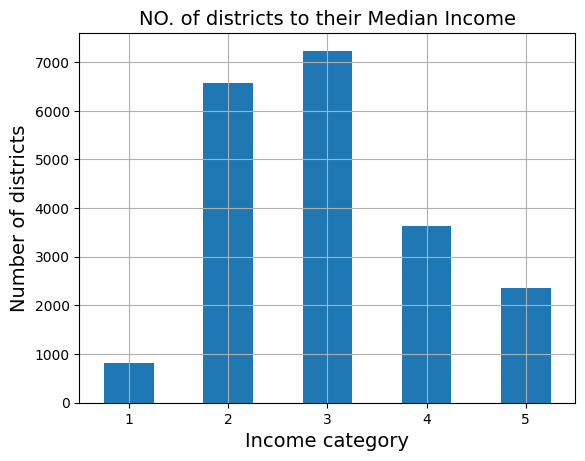

In [148]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.title("NO. of districts to their Median Income")
plt.xlabel("Income category")
plt.ylabel("Number of districts")
#save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [149]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [150]:
strat_train_set, strat_test_set = strat_splits[0]

It's much shorter to get a single Stratified Split:

In [151]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [152]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [153]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [154]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

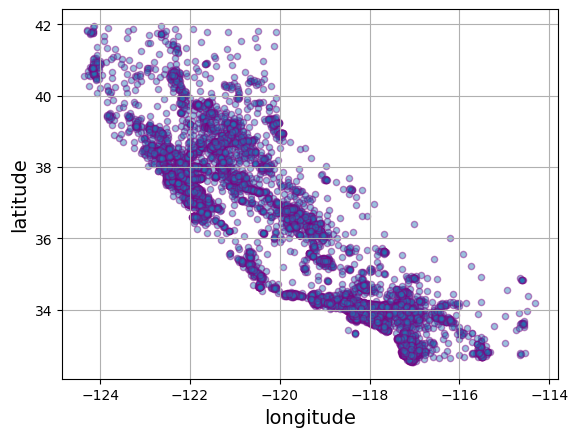

In [155]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.45,edgecolor="Purple" ,grid=True)
#save_fig("bad_visualization_plot")  # extra code
plt.show()

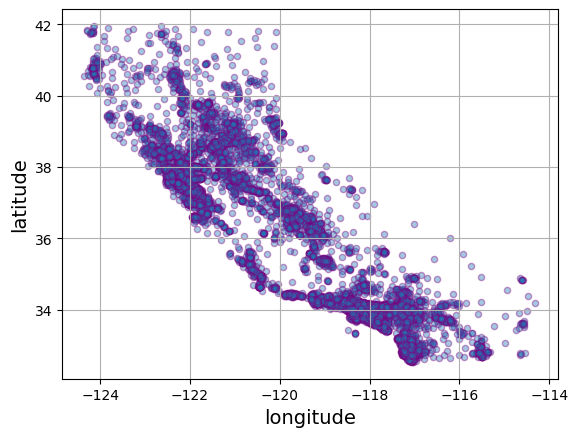

In [156]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.4,edgecolor="Purple")
#save_fig("better_visualization_plot")  # extra code
plt.show()

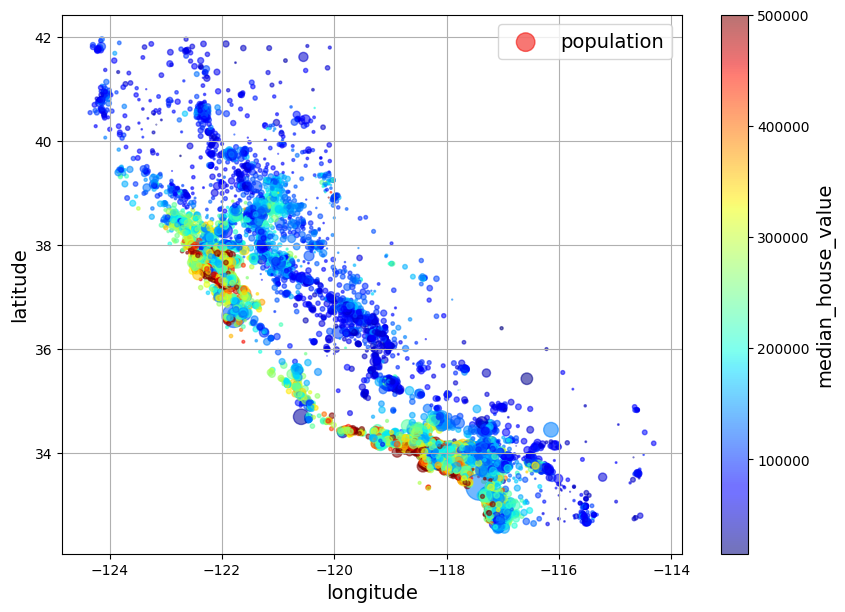

In [157]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",alpha=0.55,
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
#save_fig("housing_prices_scatterplot")  # extra code
plt.show()

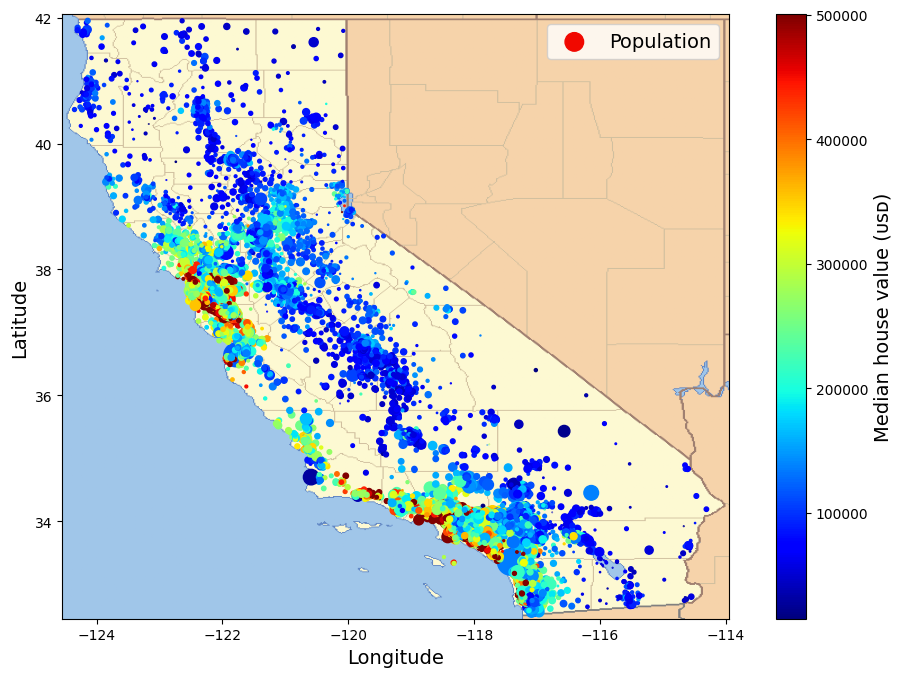

In [158]:
# extra code – this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

# Looking For Correlations:

In [159]:
corr_matrix = housing.corr(numeric_only=True)

In [160]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


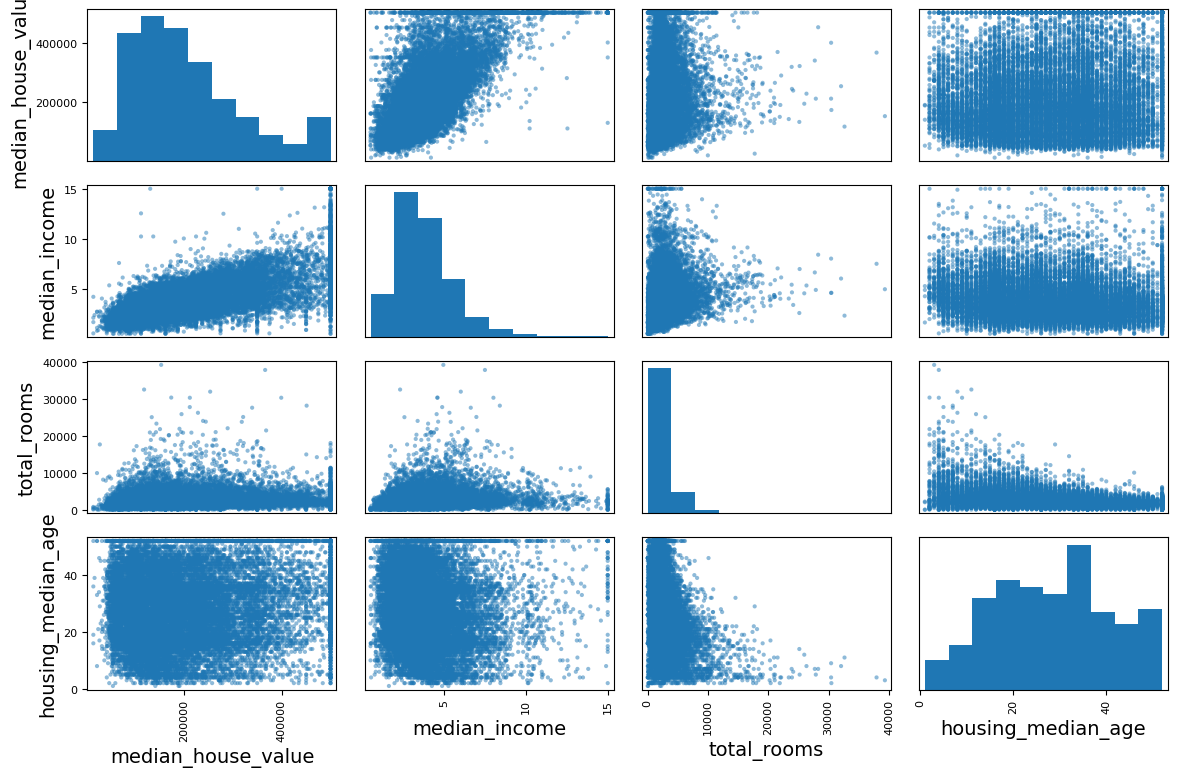

In [161]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

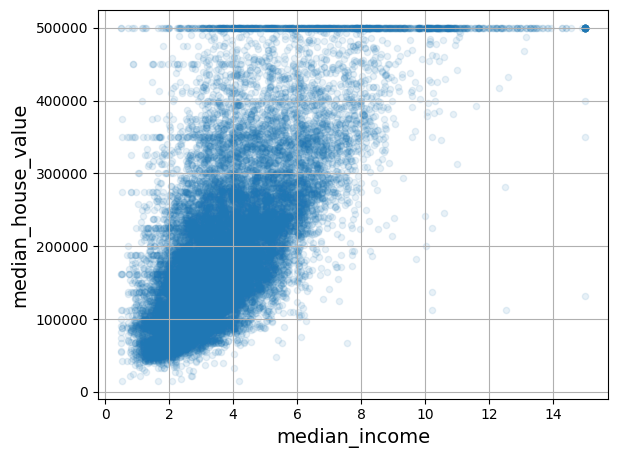

In [162]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()